In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import skimage

from PIL import Image, ImageSequence

In [4]:
vsi_dir = '../data/TimeLapse_20190517_15052019_L-algMono-0.1/'
tiff_dir = '../data/TimeLapse_20190517_15052019_L-algMono-0.1_tiff/'

In [5]:
tiff_dir + os.listdir(tiff_dir)[0]

'../data/TimeLapse_20190517_15052019_L-algMono-0.1_tiff/15052019_L-algMono-0.1_Pos25_PH_Exp001.tiff'

In [6]:
num_pages = []
for t in os.listdir(tiff_dir):
    im = Image.open(tiff_dir + t)
    all_pages = []
    for i, page in enumerate(ImageSequence.Iterator(im)):
        all_pages.append(np.array(page))
    num_pages.append(len(all_pages))

In [7]:
np.where(np.array(num_pages) > 1)

(array([16, 35, 43, 45]),)

In [8]:
os.listdir(tiff_dir)[16]

'15052019_L-algMono-0.1_Pos9_PH_Exp001.tiff'

In [9]:
im = Image.open(tiff_dir + os.listdir(tiff_dir)[16])
all_pages = []
for i, page in enumerate(ImageSequence.Iterator(im)):
    all_pages.append(np.array(page))

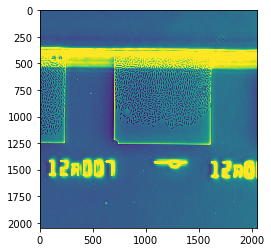

In [10]:
data = all_pages[-1]#[400:1200,500:1700]
data = data/np.max(data)
plt.imshow(data)

In [11]:
from skimage.feature import canny
edges = canny(data)

/cluster/apps/python/3.6.1/x86_64/lib64/python3.6/site-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


In [12]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)

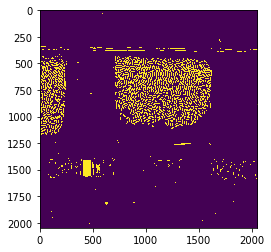

In [13]:
plt.imshow(fill_coins)